In [3]:
from torchvision import transforms
import numpy as np
import torch
from torch import Tensor
from torch import nn
from torch.functional import F
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import os
from typing import Dict, Tuple, Union, NewType, List, Optional, Any
from pathlib import Path, WindowsPath
import warnings
import pickle
warnings.filterwarnings("ignore")
import seaborn as sns

def load_obj(path: str) -> Any:
    with open(path, 'rb') as f:
        return pickle.load(f)
    

def show_cam_on_image(img, mask):
    heatmap = cv2.applyColorMap(np.uint8(255 * mask), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255
    cam = heatmap + np.float32(img)
    cam = cam / np.max(cam)
    return cam

def visu(original_image, transformer_attribution, file_name: str):
    transformer_attribution = transformer_attribution.reshape(1, 1, 14, 14)
    transformer_attribution = torch.nn.functional.interpolate(transformer_attribution, scale_factor=16, mode='bilinear')
    transformer_attribution = transformer_attribution.reshape(224, 224).data.cpu().numpy()
    transformer_attribution = (transformer_attribution - transformer_attribution.min()) / (
            transformer_attribution.max() - transformer_attribution.min())
    image_transformer_attribution = original_image.permute(1, 2, 0).data.cpu().numpy()
    image_transformer_attribution = (image_transformer_attribution - image_transformer_attribution.min()) / (
            image_transformer_attribution.max() - image_transformer_attribution.min())
    vis = show_cam_on_image(image_transformer_attribution, transformer_attribution)
    vis = np.uint8(255 * vis)
    vis = cv2.cvtColor(np.array(vis), cv2.COLOR_RGB2BGR)
    plt.imsave(fname=Path('plots', f'{file_name}.png'),
               arr=vis,
               format='png')
    
from torchvision import transforms
IMAGENET_STANDARD_MEAN = [0.5, 0.5, 0.5]
IMAGENET_STANDARD_STD = [0.5, 0.5, 0.5]
normalize = transforms.Normalize(mean=IMAGENET_STANDARD_MEAN, std=IMAGENET_STANDARD_STD)
image_transformations = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
#     normalize,
])
def patch_score_to_image(transformer_attribution):
    transformer_attribution = transformer_attribution.reshape(1, 1, 14, 14)
    transformer_attribution = torch.nn.functional.interpolate(transformer_attribution, scale_factor=16, mode='bilinear')
    transformer_attribution = transformer_attribution.reshape(224, 224).data.cpu().numpy()
    transformer_attribution = (transformer_attribution - transformer_attribution.min()) / (
            transformer_attribution.max() - transformer_attribution.min())
    return transformer_attribution

def perbutation(vis, pic):
    """
    vis.shape: (n_tokens, )
    _data.shape: ([3, 224, 224])
    """
    base_size = 224 * 224
    perturbation_steps = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    org_shape = (1, 3, 224, 224)
    fig, axs = plt.subplots(3, 3)
    _data = pic.clone()
    vis_picture = torch.tensor(patch_score_to_image(vis).reshape(-1))
    for i in range(len(perturbation_steps)):
        _, idx = torch.topk(vis_picture, int(base_size * perturbation_steps[i]), dim=-1) # vis.shape (50176) / 2 = 25088
        idx = idx.unsqueeze(1).repeat(1, org_shape[1], 1)
        _data = _data.reshape(org_shape[0], org_shape[1], -1)
        _data = _data.scatter_(-1, idx.reshape(1, 3, -1), 0)
        _data = _data.reshape(*org_shape)

        im = transforms.ToPILImage()(_data.squeeze(0))
        plt.imshow(im)
        plt.subplot(3,3,i+1)
        plt.imshow(im)
        plt.title(f'{perturbation_steps[i]}%')
        plt.subplots_adjust(hspace=0.6, wspace=0.2)

In [34]:
tokens_mask_path = r"C:\Users\asher\OneDrive\Documents\Data Science Degree\Tesis\Explainability NLP\explainablity-transformer\research\plots\verify_vis_mul_temp_softmax_lr0_003+l1_0+kl_loss_0+entropy_loss_1000+pred_loss_10\0000000001\objects\tokens_mask.pkl"
mask = load_obj(tokens_mask_path)[-1]
image = Image.open(r"C:\Users\asher\OneDrive\Documents\Data Science Degree\Tesis\Explainability NLP\explainablity-transformer\research\plots\vis_mul_temp_softmax_lr0_003+l1_1000+kl_loss_0+entropy_loss_100+pred_loss_10\0000000001\224x224.JPEG")
image = image_transformations(image)
visu(image, mask.median(dim=0)[0], 'test')

C:\Users\asher\Anaconda3\envs\explainability\lib\site-packages\torch\nn\functional.py:3613: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


In [5]:
pic = Image.open(r"C:\Users\asher\OneDrive\Documents\Data Science Degree\Tesis\Explainability NLP\explainablity-transformer\research\plots\vis_mul_temp_softmax_lr0_003+l1_1000+kl_loss_0+entropy_loss_100+pred_loss_10\0000000001\224x224.JPEG")
pic = image_transformations(pic)

In [ ]:
im

In [ ]:
im_tensor = transforms.ToTensor()(im)

In [ ]:
torch.tensor(fe(im)['pixel_values'][0])

In [ ]:
torch.equal(torch.tensor(fe(im_tensor)['pixel_values'][0]), torch.tensor(fe(im)['pixel_values'][0]))

In [ ]:
t = torch.tensor(fe(im)['pixel_values'][0])
image_transformed = transforms.ToPILImage()(t)
display(image_transformed)

In [ ]:
from torchvision import transforms
l = load_obj(r"C:\Users\asher\OneDrive\Documents\Data Science Degree\Tesis\Explainability NLP\explainablity-transformer\data\pic.pkl")
im = transforms.ToPILImage()(l.squeeze(0))
display(im)
print(im)

In [ ]:
from torchvision import transforms
# im = transforms.ToPILImage()(_data.squeeze(0))
im = transforms.ToPILImage()(pic.squeeze(0))
display(im)
print(im)

In [3]:
image

tensor([[[-0.1922, -0.1922, -0.2000,  ...,  0.8824,  0.8824,  0.8902],
         [-0.1922, -0.1922, -0.2000,  ...,  0.8824,  0.8824,  0.8902],
         [-0.1922, -0.2000, -0.2000,  ...,  0.8824,  0.8824,  0.8902],
         ...,
         [ 0.7176,  0.6941,  0.7176,  ...,  0.7020,  0.7020,  0.7098],
         [ 0.7176,  0.7020,  0.7098,  ...,  0.7098,  0.7176,  0.7255],
         [ 0.7098,  0.7020,  0.7098,  ...,  0.7255,  0.7333,  0.7412]],

        [[-0.1608, -0.1608, -0.1686,  ...,  0.9059,  0.9059,  0.9137],
         [-0.1608, -0.1608, -0.1686,  ...,  0.9059,  0.9059,  0.9137],
         [-0.1608, -0.1686, -0.1686,  ...,  0.9059,  0.9059,  0.9137],
         ...,
         [ 0.6863,  0.6627,  0.6706,  ...,  0.3569,  0.3569,  0.3647],
         [ 0.6784,  0.6706,  0.6784,  ...,  0.3647,  0.3725,  0.3804],
         [ 0.6706,  0.6706,  0.6784,  ...,  0.3804,  0.3882,  0.3961]],

        [[-0.1373, -0.1373, -0.1451,  ...,  0.9765,  0.9765,  0.9843],
         [-0.1373, -0.1373, -0.1451,  ...,  0

In [13]:
vis.shape

torch.Size([50176])

In [14]:
_data.shape

torch.Size([1, 3, 224, 224])

In [26]:
base_size = 224 * 224
perturbation_steps = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
i = 4
vis = mask.median(dim=0)[0]
_data = image

vis_picture = torch.tensor(patch_score_to_image(vis).reshape(-1))

In [28]:
vis.shape

torch.Size([196])

In [ ]:
vis = vis_picture
_data = pic.clone()
i = 5

In [33]:
pic.shape, vis.shape

(torch.Size([3, 224, 224]), torch.Size([196]))

C:\Users\asher\Anaconda3\envs\explainability\lib\site-packages\torch\nn\functional.py:3613: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


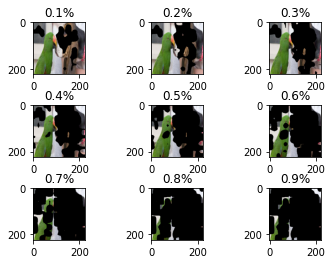

In [31]:
perbutation(vis=vis, pic=pic)

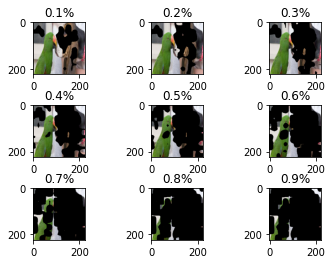

In [10]:
from torchvision import transforms

vis = vis_picture
_data = pic.clone()
i = 5

org_shape = (1, 3, 224, 224)
fig, axs = plt.subplots(3, 3)

for i in range(len(perturbation_steps)):
    _, idx = torch.topk(vis, int(base_size * perturbation_steps[i]), dim=-1) # vis.shape (50176) / 2 = 25088
    idx = idx.unsqueeze(1).repeat(1, org_shape[1], 1)
    _data = _data.reshape(org_shape[0], org_shape[1], -1)
    _data = _data.scatter_(-1, idx.reshape(1, 3, -1), 0)
    _data = _data.reshape(*org_shape)

    im = transforms.ToPILImage()(_data.squeeze(0))
    plt.imshow(im)
    plt.subplot(3,3,i+1)
    plt.imshow(im)
    plt.title(f'{perturbation_steps[i]}%')
    plt.subplots_adjust(hspace=0.6, wspace=0.2)
#     display(im)
#     print(im)

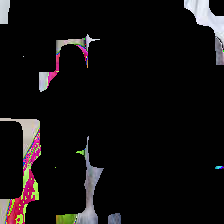

In [363]:
im = transforms.ToPILImage()(normalize(_data).squeeze(0))
display(im)

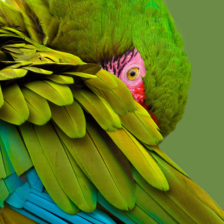

In [438]:
im

In [5]:
from sklearn.metrics import roc_curve, roc_auc_score

In [1]:
import sklearn

In [2]:
sklearn.__version__

'1.0.2'

In [28]:
y_true = [1, 0, 0 ,0]
y_pred = [0.39, 0.41, 0.1, 0.1]
roc_auc_score(y_true, y_pred, multi_class='ovr', average='macro')

0.6666666666666667

In [33]:
y_pred = torch.tensor([[1.1707e-03, 2.6085e-04, 1.2435e-04, 2.0575e-04, 5.0084e-04, 1.0696e-03,
         1.9911e-04, 5.9036e-04, 2.0862e-04, 1.8151e-04, 2.8855e-04, 9.4499e-05,
         1.5136e-04, 5.3997e-05, 8.3040e-05, 9.3548e-05, 1.5342e-04, 9.8811e-05,
         1.8865e-04, 1.0280e-04, 7.7556e-05, 5.0902e-04, 1.5180e-04, 1.8944e-04,
         5.0093e-04, 2.7425e-04, 1.0561e-03, 2.7790e-04, 2.3507e-04, 1.7867e-04,
         4.0907e-04, 2.8889e-04, 1.1718e-03, 3.7576e-04, 6.6487e-04, 4.2008e-04,
         6.0374e-04, 2.1077e-04, 1.5839e-02, 2.0385e-03, 2.4851e-04, 3.5955e-03,
         8.4711e-04, 1.1825e-02, 1.1917e-03, 2.1487e-03, 3.2246e-04, 8.4557e-03,
         2.3715e-03, 2.4946e-04, 1.7327e-04, 8.8194e-02, 1.1063e-03, 1.2183e-03,
         1.1823e-03, 6.9370e-04, 7.9601e-04, 3.0000e-04, 6.3015e-04, 1.4536e-03,
         3.1525e-03, 6.1687e-04, 3.6073e-03, 3.3029e-02, 3.0987e-03, 3.0178e-03,
         8.4270e-03, 1.9717e-03, 4.8986e-03, 9.0845e-04, 8.0210e-05, 4.5439e-04,
         1.1402e-04, 3.2476e-04, 7.3399e-05, 5.3530e-05, 3.6651e-04, 5.5634e-05,
         6.8585e-05, 1.5249e-04, 3.6894e-03, 1.2174e-04, 5.9572e-04, 6.7868e-04,
         3.2949e-04, 3.5711e-04, 1.8941e-04, 2.0802e-04, 5.0507e-04, 2.0027e-04,
         2.6593e-04, 3.1023e-04, 1.6047e-04, 4.3280e-04, 1.5437e-04, 5.3353e-04,
         7.7000e-04, 6.6458e-05, 1.0548e-04, 1.3985e-04, 1.9800e-04, 1.1329e-03,
         3.4005e-04, 4.8877e-04, 2.9369e-04, 1.1840e-04, 2.7679e-04, 3.1553e-04,
         2.5373e-04, 1.4675e-03, 6.1015e-04, 5.3051e-04, 1.1569e-03, 8.7106e-04,
         1.3701e-04, 5.0731e-04, 1.5771e-03, 1.9409e-03, 1.2842e-04, 1.6018e-04,
         2.1749e-04, 1.9757e-04, 1.1915e-04, 2.5381e-04, 6.8788e-05, 2.5675e-04,
         1.6598e-03, 7.4401e-05, 1.6490e-04, 5.5685e-05, 3.0830e-05, 6.2653e-05,
         8.4839e-05, 3.9231e-05, 5.5462e-05, 2.8998e-04, 6.2466e-05, 9.0997e-05,
         1.6557e-04, 8.5388e-05, 1.1783e-04, 6.9933e-05, 1.1723e-04, 7.7645e-05,
         2.0189e-04, 1.9133e-04, 1.1377e-04, 1.3917e-04, 1.0060e-04, 9.0312e-04,
         2.6690e-04, 1.6463e-04, 1.2288e-04, 1.3172e-04, 5.2489e-05, 1.3420e-04,
         4.9944e-05, 1.8004e-04, 5.8205e-05, 6.7969e-05, 1.5339e-04, 9.3719e-05,
         8.4938e-05, 1.3069e-04, 4.7336e-04, 2.0291e-04, 5.3308e-05, 8.9517e-05,
         1.7676e-04, 3.6983e-05, 1.8099e-04, 6.2603e-05, 3.2623e-05, 1.8338e-05,
         1.9655e-04, 8.2863e-05, 8.5884e-05, 7.6244e-05, 7.3654e-05, 1.6243e-04,
         3.8045e-05, 1.4046e-04, 4.6089e-05, 2.4897e-04, 3.2790e-05, 4.7097e-05,
         9.6751e-05, 6.7449e-05, 1.3056e-04, 6.7466e-05, 9.6722e-05, 8.6144e-05,
         6.7590e-05, 3.1177e-05, 1.5724e-04, 4.4683e-05, 9.3479e-05, 1.2406e-04,
         1.0012e-04, 1.2693e-04, 9.1738e-05, 6.0619e-05, 5.7401e-05, 1.3859e-04,
         9.7670e-05, 1.9441e-04, 4.7401e-04, 1.0245e-04, 2.2202e-04, 9.7253e-05,
         5.0177e-04, 8.2249e-05, 1.4301e-04, 2.1874e-04, 8.7995e-05, 1.5527e-04,
         1.3979e-04, 7.4218e-05, 1.0098e-04, 1.8399e-04, 1.4066e-04, 2.5173e-04,
         1.1736e-04, 3.0308e-04, 5.3882e-04, 4.3244e-04, 1.0785e-04, 5.9457e-04,
         3.9385e-04, 1.8448e-04, 1.5553e-04, 9.7257e-05, 1.1153e-04, 4.3462e-04,
         1.3556e-04, 2.5469e-04, 1.0878e-04, 1.9255e-04, 5.5353e-05, 1.1720e-04,
         4.9829e-05, 6.6912e-05, 2.0366e-05, 8.5646e-05, 2.8400e-04, 4.7920e-05,
         1.3647e-04, 5.9436e-05, 7.2882e-05, 1.4459e-04, 1.4338e-04, 1.5609e-04,
         2.6031e-04, 4.0594e-05, 1.7595e-04, 1.6574e-04, 2.5173e-04, 1.4599e-04,
         5.9876e-05, 1.4699e-04, 1.1631e-04, 1.6221e-04, 1.9828e-04, 1.0328e-04,
         9.8306e-05, 9.7226e-05, 1.5861e-04, 1.1465e-04, 1.5326e-04, 4.0255e-04,
         3.9524e-04, 3.1428e-04, 4.2613e-04, 2.7656e-04, 2.0135e-04, 1.8917e-04,
         7.5938e-05, 2.6435e-04, 2.6654e-04, 1.8442e-04, 6.7263e-04, 2.4587e-04,
         4.3454e-05, 7.9640e-05, 8.8535e-05, 6.6379e-04, 6.4782e-04, 3.3278e-04,
         7.6799e-04, 5.2159e-04, 5.6936e-04, 1.4959e-04, 2.0650e-04, 4.1798e-04,
         4.3239e-04, 9.6130e-04, 8.4489e-05, 7.1398e-04, 1.4337e-04, 2.0458e-04,
         6.7508e-05, 4.7129e-05, 9.4716e-05, 7.7455e-05, 4.8149e-05, 1.0580e-04,
         2.5742e-04, 1.9571e-04, 1.0851e-04, 5.9018e-04, 8.9800e-05, 5.2699e-05,
         4.0910e-05, 1.1373e-04, 8.7112e-05, 8.3594e-05, 7.7460e-05, 4.9354e-05,
         9.5074e-05, 2.4030e-04, 9.6533e-05, 6.3988e-05, 1.0009e-04, 7.4245e-05,
         8.7795e-05, 2.1122e-04, 1.5815e-04, 5.6134e-04, 1.1211e-03, 4.6021e-04,
         3.8910e-04, 2.7612e-04, 1.7513e-04, 5.7398e-05, 3.2617e-04, 5.1950e-04,
         1.5824e-04, 1.7947e-04, 9.5524e-05, 1.4218e-04, 3.0515e-04, 4.6634e-04,
         1.6779e-04, 1.3938e-04, 1.9653e-04, 9.8757e-04, 1.9600e-04, 5.2392e-04,
         3.9003e-04, 7.5411e-04, 9.6698e-04, 4.6180e-04, 7.3751e-05, 6.4994e-05,
         4.3005e-04, 1.9216e-04, 7.4331e-05, 1.3122e-04, 1.6762e-04, 1.4456e-04,
         1.2364e-04, 5.7138e-04, 2.2692e-04, 4.4469e-03, 5.6091e-04, 1.0105e-03,
         6.6168e-04, 9.7446e-04, 3.5695e-04, 6.3952e-04, 4.3250e-04, 3.3718e-04,
         3.8757e-04, 2.4172e-04, 5.1095e-04, 5.0802e-04, 4.2853e-04, 1.4254e-03,
         4.2470e-04, 1.1989e-03, 3.2173e-04, 5.1503e-04, 5.7932e-04, 9.1690e-04,
         2.2099e-03, 1.2973e-03, 1.0320e-03, 2.6338e-04, 2.6553e-04, 1.5470e-03,
         1.1099e-03, 3.9820e-04, 1.7343e-03, 1.7237e-04, 1.1151e-03, 1.6045e-03,
         5.1978e-04, 5.2175e-04, 1.8159e-04, 1.1627e-02, 5.3230e-03, 2.3646e-03,
         5.6693e-05, 3.9337e-04, 2.9216e-04, 3.2911e-03, 4.9062e-04, 1.8940e-03,
         3.3704e-03, 9.7192e-04, 1.7890e-03, 5.8083e-05, 8.9118e-04, 4.1346e-02,
         1.9082e-04, 3.3064e-04, 4.8170e-04, 1.7992e-04, 8.5798e-05, 3.7535e-04,
         4.3064e-04, 1.8149e-04, 3.3991e-04, 2.4833e-04, 3.9626e-04, 5.2650e-04,
         1.4448e-04, 1.7387e-03, 2.9100e-04, 1.7059e-04, 5.8127e-04, 1.2759e-04,
         8.1432e-04, 9.3545e-05, 8.8059e-05, 2.4924e-05, 2.7129e-04, 1.4022e-03,
         2.0420e-04, 1.1234e-02, 2.0499e-04, 7.2104e-05, 6.6625e-04, 8.6217e-05,
         4.4268e-04, 1.1904e-04, 9.3202e-05, 2.6700e-04, 4.3272e-04, 4.6385e-04,
         1.4706e-04, 6.3446e-04, 2.6868e-04, 1.8092e-04, 2.2386e-04, 1.3264e-04,
         3.4741e-03, 4.6101e-04, 3.7823e-04, 2.5443e-04, 3.2974e-04, 1.2027e-02,
         1.0074e-03, 7.3372e-05, 3.7399e-04, 5.2888e-02, 1.9358e-04, 1.5955e-04,
         4.2406e-04, 1.2717e-03, 6.3763e-04, 9.1788e-03, 1.5138e-04, 4.1262e-04,
         2.4238e-04, 1.6958e-04, 8.6630e-04, 6.9258e-04, 1.7017e-04, 1.6472e-04,
         8.2055e-04, 1.5338e-04, 5.5384e-05, 1.0879e-03, 1.4040e-04, 5.7480e-05,
         3.1557e-04, 2.3741e-04, 4.4862e-04, 2.3987e-04, 3.7724e-02, 5.9413e-04,
         6.1279e-04, 6.9671e-05, 8.6392e-04, 1.3601e-04, 9.6100e-05, 4.1939e-04,
         4.4010e-04, 1.3656e-04, 6.7274e-04, 4.7615e-03, 3.1130e-04, 1.0778e-04,
         1.3059e-04, 2.9600e-04, 6.5856e-04, 9.7555e-05, 1.2090e-04, 4.8626e-04,
         2.5235e-04, 4.8497e-04, 1.3589e-04, 7.8249e-04, 4.3768e-04, 1.0304e-03,
         5.0927e-05, 1.7563e-03, 9.2879e-04, 1.2409e-03, 4.4606e-05, 2.6512e-05,
         2.7211e-04, 1.4655e-03, 1.9712e-02, 5.3580e-04, 1.4422e-04, 1.6729e-04,
         4.3119e-05, 1.2530e-04, 2.5827e-04, 1.3090e-04, 1.3833e-04, 2.3996e-04,
         4.7761e-05, 2.3513e-04, 2.0426e-04, 1.6858e-04, 1.3403e-03, 3.1219e-04,
         2.3784e-04, 3.3286e-04, 2.1456e-04, 1.8678e-04, 1.5251e-04, 1.1844e-04,
         3.7836e-04, 4.5061e-04, 8.4865e-05, 9.5518e-05, 4.2627e-05, 1.4058e-04,
         1.2100e-04, 1.3381e-04, 4.6961e-04, 2.0836e-03, 1.3846e-03, 9.0162e-04,
         1.9052e-03, 9.5379e-05, 1.7344e-04, 4.3448e-03, 1.5472e-03, 9.0989e-05,
         1.0561e-04, 4.0838e-04, 3.9131e-04, 2.8472e-05, 7.1251e-04, 9.9887e-04,
         2.3900e-03, 3.7755e-04, 1.5077e-04, 3.9945e-04, 3.6118e-04, 1.7787e-03,
         3.1034e-04, 1.9660e-03, 2.7128e-04, 5.4829e-04, 1.2319e-03, 5.3276e-04,
         2.4861e-04, 4.0077e-03, 1.3540e-04, 2.3990e-04, 5.3749e-03, 2.3144e-04,
         3.7495e-04, 4.2333e-05, 5.3162e-04, 2.0184e-04, 9.5934e-05, 3.2139e-04,
         8.5152e-04, 2.5006e-03, 1.1085e-03, 1.1137e-03, 1.9759e-04, 2.6473e-02,
         5.8958e-04, 1.2005e-03, 2.0430e-03, 3.7570e-04, 1.2804e-04, 8.2818e-05,
         1.0913e-04, 1.4703e-04, 1.7455e-04, 1.3762e-03, 5.7175e-04, 7.0618e-04,
         1.8493e-03, 1.3916e-04, 4.9584e-04, 5.1848e-04, 4.0658e-04, 3.0033e-04,
         1.4282e-04, 5.4376e-04, 2.8182e-04, 8.3572e-04, 5.1589e-05, 1.7830e-04,
         4.5509e-04, 2.7747e-04, 5.2292e-04, 5.4984e-04, 2.1726e-04, 1.4211e-04,
         2.6515e-04, 7.2286e-05, 3.7462e-04, 2.1643e-04, 1.9307e-03, 2.2757e-04,
         5.0989e-04, 2.6419e-04, 1.7955e-04, 6.0931e-05, 5.6836e-04, 1.9508e-04,
         3.3448e-04, 1.2909e-03, 2.5369e-04, 8.0485e-04, 2.2959e-03, 1.5503e-05,
         1.5683e-04, 1.3754e-03, 4.6306e-04, 1.5259e-04, 5.5394e-02, 1.5368e-03,
         8.8346e-04, 1.7882e-04, 4.4002e-04, 2.0503e-03, 1.4312e-04, 3.3531e-05,
         3.2420e-04, 5.1123e-04, 7.5222e-05, 3.3202e-04, 1.0827e-04, 2.2262e-04,
         3.2180e-04, 1.3920e-03, 2.5193e-03, 1.8011e-04, 4.0749e-04, 3.1604e-04,
         1.5545e-04, 5.8919e-05, 4.0139e-04, 2.9241e-04, 1.0420e-04, 1.7364e-04,
         5.1670e-04, 1.7565e-04, 1.9419e-04, 8.1614e-05, 7.1731e-04, 8.9158e-04,
         2.9516e-04, 3.7912e-05, 4.9852e-04, 2.0852e-04, 2.3565e-04, 6.3649e-04,
         2.2420e-03, 3.3702e-03, 5.5121e-04, 1.8993e-04, 3.6178e-04, 2.6861e-04,
         3.2635e-04, 1.4246e-04, 1.3093e-03, 1.6327e-03, 2.0808e-04, 6.5508e-04,
         2.2517e-03, 9.4399e-04, 1.7941e-04, 3.9455e-04, 1.7181e-04, 4.5269e-04,
         5.3320e-04, 1.3610e-04, 2.6898e-04, 4.9438e-04, 2.4100e-04, 1.4285e-04,
         9.7672e-05, 1.5033e-02, 6.2210e-04, 2.1860e-04, 5.2585e-04, 1.2032e-04,
         9.4747e-05, 1.9810e-04, 7.4270e-05, 2.6064e-04, 5.6263e-04, 1.7802e-04,
         3.9382e-04, 2.1065e-03, 5.7987e-04, 1.9254e-04, 6.7538e-04, 3.4625e-04,
         1.5233e-04, 1.2105e-03, 2.3159e-03, 5.7095e-04, 1.3500e-04, 1.2885e-04,
         3.4977e-04, 4.6527e-04, 1.9754e-04, 1.8548e-03, 9.7232e-05, 5.4226e-03,
         8.0768e-03, 1.2419e-04, 1.0672e-04, 2.4384e-04, 3.7410e-04, 3.9097e-04,
         9.4343e-05, 4.3657e-04, 9.8125e-05, 2.0299e-04, 2.6416e-04, 8.4392e-04,
         3.4458e-04, 1.7481e-04, 2.8291e-04, 7.9000e-05, 1.9722e-04, 1.0239e-04,
         2.1794e-04, 2.1789e-03, 3.2784e-02, 1.4537e-04, 2.3641e-04, 5.9361e-05,
         4.2077e-04, 1.3158e-04, 3.0787e-04, 1.0508e-04, 1.6785e-04, 1.7390e-04,
         2.5540e-04, 2.8027e-04, 6.1796e-04, 2.7442e-03, 9.7356e-05, 1.1882e-03,
         6.9857e-04, 4.0070e-04, 1.7231e-04, 1.3285e-04, 1.3982e-04, 1.9959e-04,
         1.5438e-04, 3.5963e-03, 2.5296e-04, 3.0365e-04, 5.2310e-04, 3.8677e-04,
         1.4970e-03, 1.3774e-04, 1.1404e-04, 2.8996e-04, 2.9542e-03, 1.1512e-04,
         1.1678e-04, 8.8339e-05, 1.5478e-03, 1.5791e-04, 1.8165e-04, 8.8553e-04,
         1.1796e-04, 3.6274e-04, 2.0718e-04, 2.1816e-03, 7.3398e-04, 4.7239e-05,
         1.7120e-04, 2.6978e-04, 1.1289e-03, 3.8603e-05, 1.7398e-04, 1.5902e-04,
         8.4854e-05, 1.5428e-04, 9.3639e-04, 3.2352e-04, 1.4851e-03, 3.8703e-04,
         8.5905e-04, 6.0626e-05, 3.9672e-04, 4.0753e-04, 1.3841e-04, 9.2850e-05,
         4.4108e-04, 7.2695e-04, 2.2616e-03, 1.7697e-05, 8.3708e-04, 4.6096e-04,
         2.0384e-03, 4.0915e-04, 9.7399e-05, 4.8895e-05, 2.0787e-04, 6.3582e-04,
         1.9704e-04, 2.4672e-04, 3.5477e-05, 9.4725e-04, 2.5310e-04, 3.0315e-04,
         3.7717e-04, 9.5027e-03, 1.1717e-04, 1.1775e-04, 1.9063e-04, 4.6750e-04,
         1.6414e-04, 2.3100e-04, 9.2325e-04, 1.5406e-03, 1.8890e-03, 1.3741e-03,
         1.8678e-04, 8.3858e-05, 1.0772e-03, 4.5654e-05, 9.0887e-04, 1.2059e-03,
         1.1326e-03, 1.7874e-03, 6.6201e-03, 2.9492e-03, 1.3126e-04, 1.5519e-03,
         2.8575e-04, 1.8262e-04, 3.9684e-04, 1.3551e-03, 1.2526e-03, 7.0617e-04,
         4.0785e-05, 4.3998e-04, 3.4539e-04, 1.0082e-03, 6.4134e-04, 4.8177e-04,
         1.7119e-04, 2.8663e-04, 5.4518e-04, 4.2511e-04, 3.8662e-04, 1.3634e-03,
         2.3895e-04, 3.0120e-04, 2.1287e-04, 6.8266e-05, 7.2510e-05, 3.4947e-04,
         1.3602e-04, 1.4435e-03, 2.5649e-05, 6.1622e-05, 1.7084e-04, 8.1472e-05,
         6.3702e-04, 3.9266e-04, 3.6573e-04, 1.2706e-04, 1.3531e-03, 1.8733e-04,
         9.4990e-04, 3.4353e-04, 2.7115e-04, 4.1530e-05, 6.1127e-05, 4.1175e-04,
         2.2672e-03, 3.0625e-04, 2.3826e-04, 2.4362e-04, 6.5083e-04, 2.4817e-03,
         1.2121e-04, 1.9756e-03, 2.5656e-03, 1.8847e-03, 6.8677e-05, 9.8598e-05,
         1.1562e-04, 1.3594e-04, 1.4311e-04, 1.1051e-04, 1.0925e-04, 1.1387e-04,
         1.2110e-04, 6.8265e-05, 9.2726e-05, 5.8459e-05, 5.3893e-05, 6.5327e-05,
         5.1052e-04, 3.4003e-04, 3.5644e-04, 1.0274e-04, 1.1476e-04, 1.2170e-04,
         6.1100e-05, 8.8616e-05, 2.3789e-04, 7.3085e-05, 9.2073e-04, 2.5565e-04,
         7.7064e-05, 2.0813e-04, 7.0925e-05, 6.2692e-05, 2.3779e-04, 2.0922e-04,
         5.4355e-05, 6.8441e-04, 5.1544e-04, 9.4062e-05, 2.0025e-04, 6.4812e-05,
         1.1774e-04, 4.0764e-05, 1.1222e-04, 1.5627e-04, 1.3957e-04, 1.9413e-04,
         1.3974e-04, 3.6057e-05, 1.0046e-04, 5.4726e-05, 2.1480e-04, 1.2482e-04,
         7.1076e-04, 4.9096e-04, 4.4877e-04, 9.9588e-04, 6.2531e-04, 1.1039e-04,
         7.9704e-04, 2.6112e-04, 1.1154e-03, 2.4069e-04, 7.1081e-04, 5.4916e-04,
         1.3575e-04, 1.4903e-04, 3.0687e-04, 1.3821e-04, 5.2307e-04, 2.1161e-04,
         9.2972e-05, 4.4385e-04, 2.7743e-04, 2.3843e-04, 5.2269e-04, 9.8161e-04,
         1.1287e-03, 2.9328e-04, 2.6225e-04, 1.1170e-04]])

In [60]:
y_true = torch.tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [61]:
y_pred[0].argmax()

tensor(51)

In [63]:
y_pred.argmax() # y_true is class = 0

tensor(51)

In [62]:
roc_auc_score(y_true[0], y_pred[0], multi_class='ovr', average=None)

0.8738738738738738